## 1. Importing Required Libraries

In [1]:
#importing all the libraries that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

sns.set(style="whitegrid")

## 2. Dataset Loading and Initial Inspection

In [2]:
#loading the dataset, displaying it and showing the info of the data (metadata in a way)
df = pd.read_csv("student_habits_performance.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## 3. Data Preprocessing

In [3]:
# data preprocessing of removing null/duplicated values, and filling empty collumns. also dropping the student_id tag
df.isnull().sum()
df.duplicated().sum()

df = df.drop(columns=["student_id"], errors="ignore")

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [4]:
# function to convert the marks to grade based on SCIS grading
def score_to_grade(score):
    if score >= 90:
        return "O"
    elif score >= 85:
        return "A+"
    elif score >= 75:
        return "A"
    elif score >= 65:
        return "B+"
    elif score >= 60:
        return "B"
    elif score >= 55:
        return "C"
    elif score >= 50:
        return "P"
    else:
        return "F"

df["Grade"] = df["exam_score"].apply(score_to_grade)

df = df.drop(columns=["exam_score"])
df["Grade"].value_counts()

Grade
B+    243
A     190
F     131
O     126
B      99
C      77
P      72
A+     62
Name: count, dtype: int64

## 4. Exploratory Data Analysis (EDA)

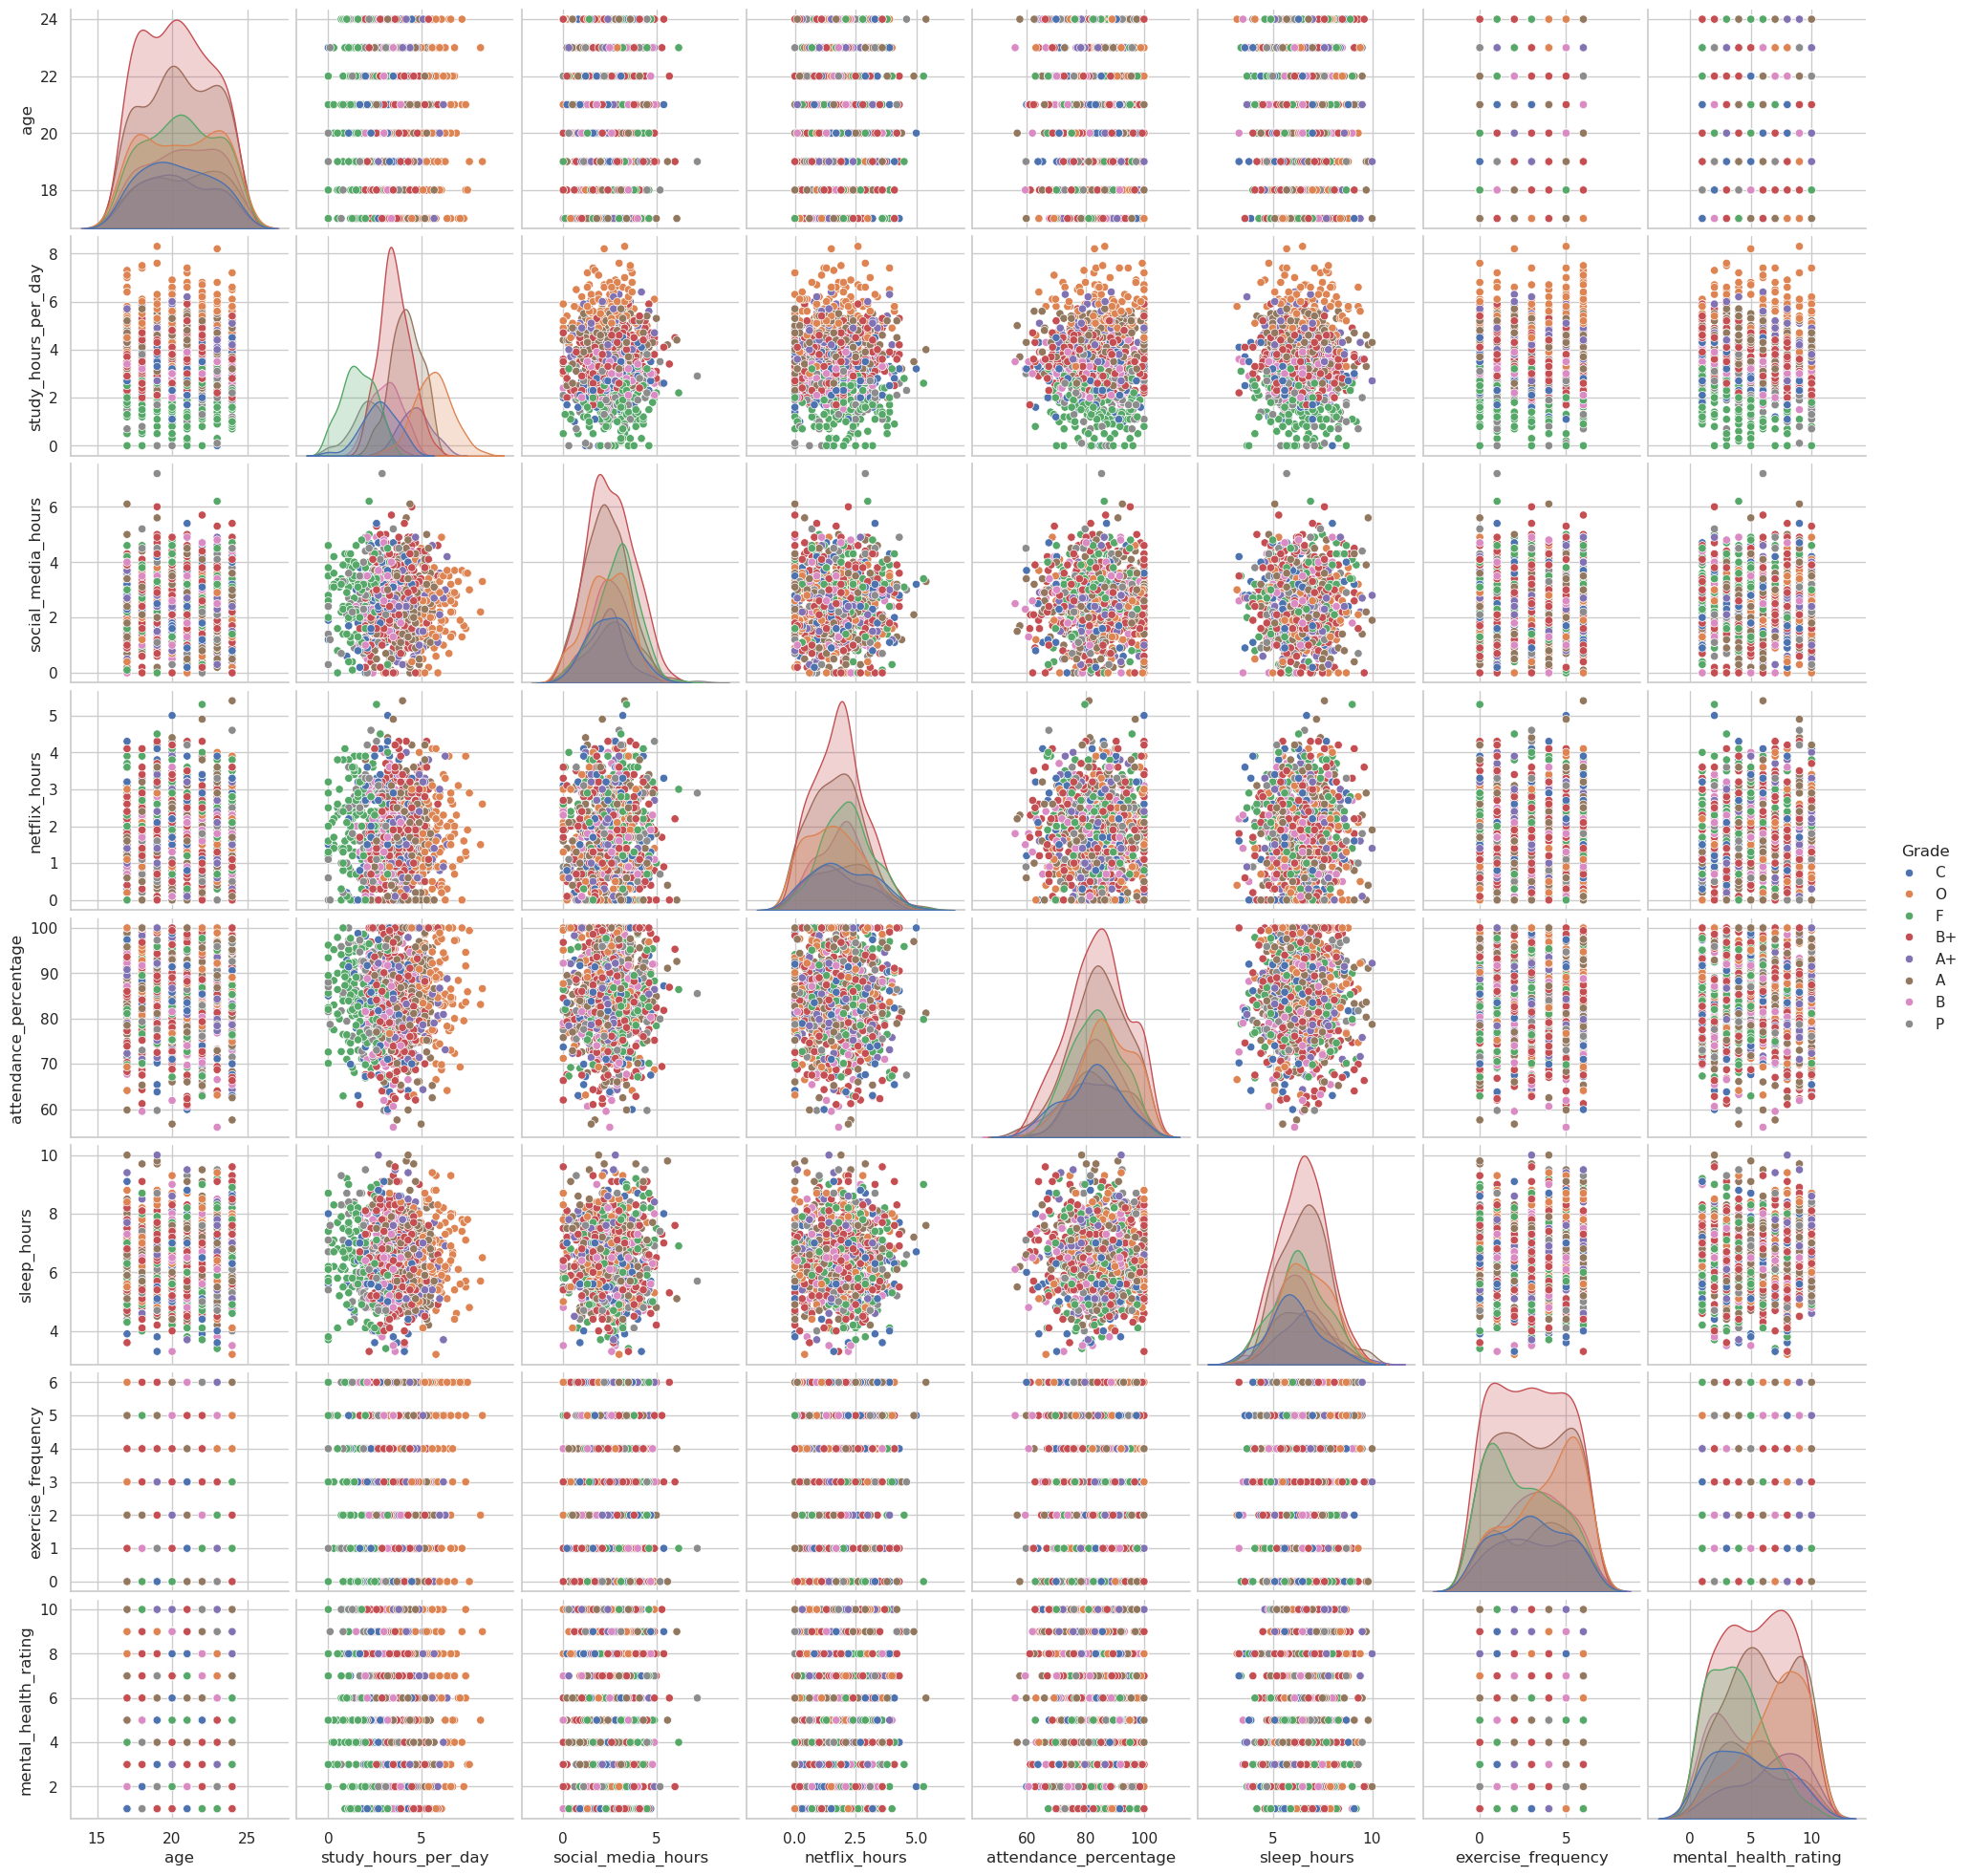

In [5]:
# showing all the possible pair-wise plots (not really necessary)
pairplot = sns.pairplot(
    df,
    hue="Grade",
    diag_kind="kde",
    corner=False
)

plt.show()

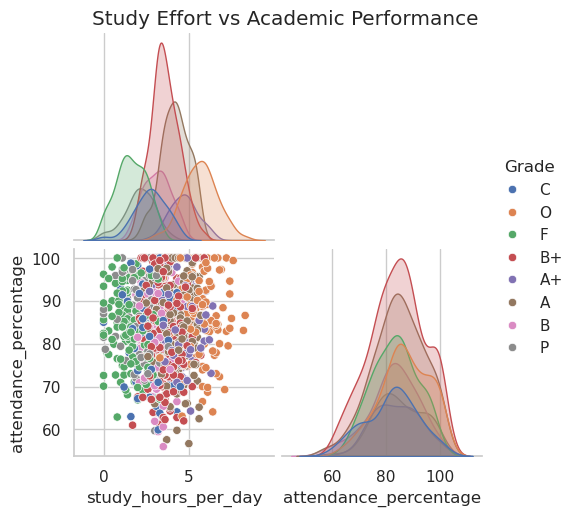

In [6]:
# showing the relation between how much is studied, the attendance percentage and the academic performance of the student
sns.pairplot(
    df,
    vars=["study_hours_per_day", "attendance_percentage"],
    hue="Grade",
    diag_kind="kde",
    corner=True
)
plt.suptitle("Study Effort vs Academic Performance", y=1.02)
plt.show()

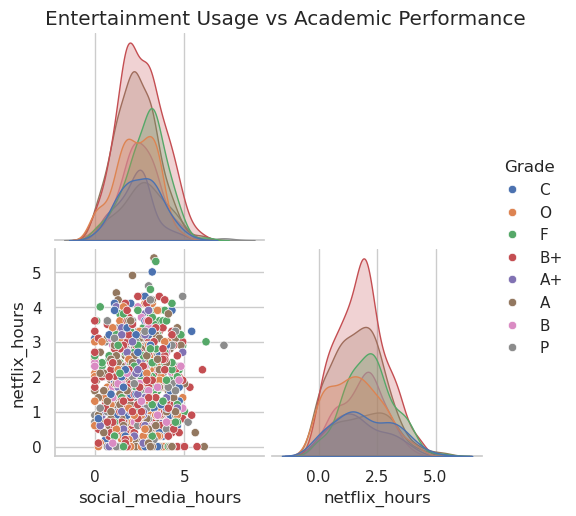

In [7]:
# showing the pair plot between usage of social media and the academic performance of students
sns.pairplot(
    df,
    vars=["social_media_hours", "netflix_hours"],
    hue="Grade",
    diag_kind="kde",
    corner=True
)
plt.suptitle("Entertainment Usage vs Academic Performance", y=1.02)
plt.show()

## 5. Model Training and Evaluation (Decision Tree)

In [8]:
y = df["Grade"]              # target
X = df.drop(columns=["Grade"])  # features
X_encoded = pd.get_dummies(X, drop_first=True)

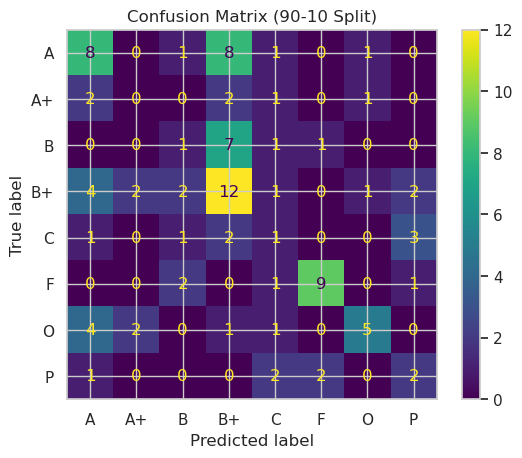

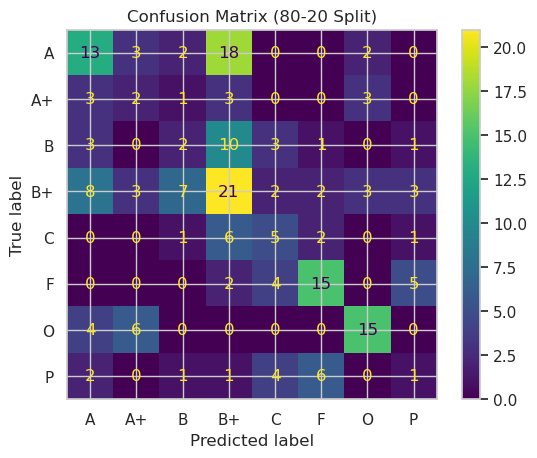

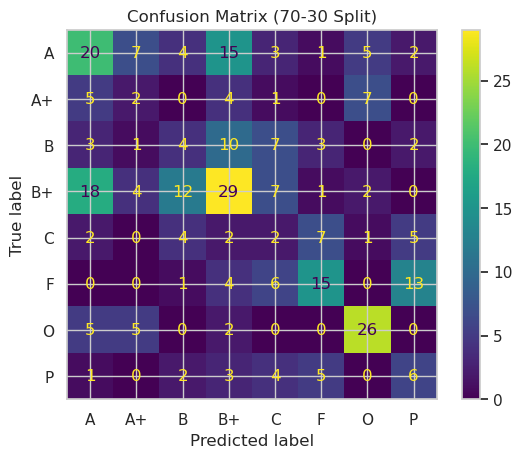

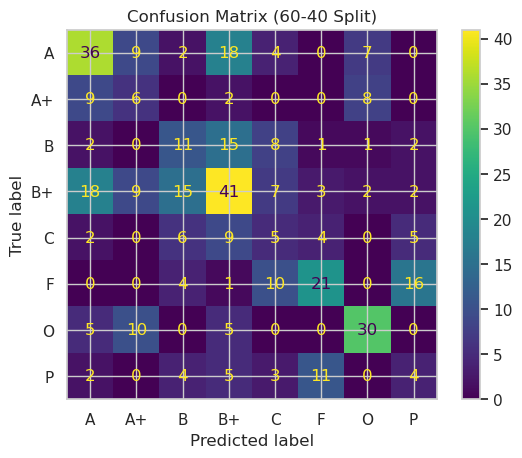

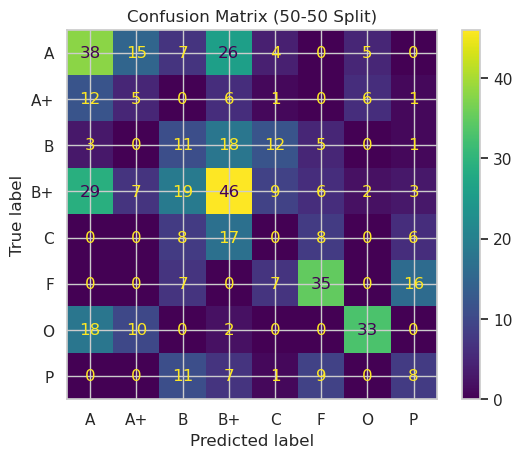

,Split,Accuracy,Precision,Recall,F1
0,90-10,0.380000,0.385425,0.380000,0.376154
1,80-20,0.370000,0.366223,0.370000,0.365740
2,70-30,0.346667,0.355496,0.346667,0.349794
3,60-40,0.385000,0.400068,0.385000,0.391048
4,50-50,0.352000,0.368355,0.352000,0.357872


In [9]:
# having the different splits to use in the loop
splits = {
    "90-10": 0.1,
    "80-20": 0.2,
    "70-30": 0.3,
    "60-40": 0.4,
    "50-50": 0.5
}

results = []

for split_name, test_size in splits.items():
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded,
        y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # training the model using DTC
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # predictions
    y_pred = model.predict(X_test)

    # confusion matrix is calculated and displayed here
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=model.classes_
    )

    disp.plot()
    plt.title(f"Confusion Matrix ({split_name} Split)")
    plt.show()

    # storing the metrics to display in table
    results.append({
        "Split": split_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1": f1_score(y_test, y_pred, average="weighted")
    })

# final results table
results_df = pd.DataFrame(results)
results_df




## 6. Performance Comparison Across Train–Test Splits

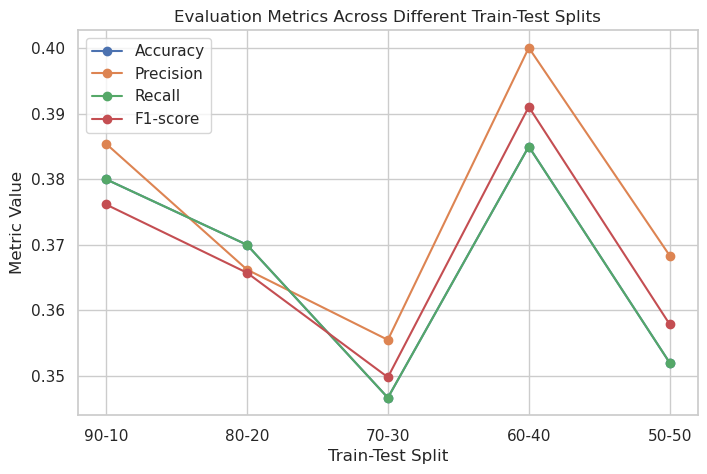

In [10]:
# plotting the graph between the test-train splits and the metrics
plt.figure(figsize=(8, 5))

# each individual metric line
plt.plot(results_df["Split"], results_df["Accuracy"], marker="o", label="Accuracy")
plt.plot(results_df["Split"], results_df["Precision"], marker="o", label="Precision")
plt.plot(results_df["Split"], results_df["Recall"], marker="o", label="Recall")
plt.plot(results_df["Split"], results_df["F1"], marker="o", label="F1-score")

# the 2 axes are defined here
plt.xlabel("Train-Test Split")
plt.ylabel("Metric Value")
plt.title("Evaluation Metrics Across Different Train-Test Splits")
plt.legend()
plt.grid(True)
plt.show()
